In [1]:
#Importing Necessary Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Importing Datasets

In [3]:
books = pd.read_csv('books.csv')
users = pd.read_csv('Users.csv')
ratings = pd.read_csv('ratings.csv')

### Understanding the Data

In [5]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
books.shape

(271360, 8)

In [9]:
users.shape

(278858, 3)

In [10]:
ratings.shape

(1149780, 3)

### Books Data Pre-Processing

In [12]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [13]:
print(books.dtypes)

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object


In [14]:
#Dropping URL columns

books = books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1)
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [15]:
books['Year-Of-Publication'].unique()

#Incorrect Values, 0 and 'DK Publishing Inc' and 'Gallimard' 

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [16]:
books[books['Year-Of-Publication'] == 'DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [17]:
books.loc[[209538,221678],['Book-Author','Year-Of-Publication']] 

,Book-Author,Year-Of-Publication
209538,2000,DK Publishing Inc
221678,2000,DK Publishing Inc


In [18]:
#Correcting Values from Book-Author and YOP Column

books.loc[[209538,221678], 'Year-Of-Publication'] = 2000
books.loc[[209538,221678], 'Book-Author'] = 'DK Publishing Inc'

In [19]:
books.loc[[209538,221678],['Book-Author','Year-Of-Publication']] 

,Book-Author,Year-Of-Publication
209538,DK Publishing Inc,2000
221678,DK Publishing Inc,2000


In [20]:
books[books['Year-Of-Publication'] == 'Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [21]:
books.loc[220731, 'Year-Of-Publication'] = 2003
books.loc[220731, 'Book-Author'] = 'Gallimard'

In [22]:
books.loc[220731, ['Year-Of-Publication', 'Book-Author']] 

Year-Of-Publication         2003
Book-Author            Gallimard
Name: 220731, dtype: object

In [23]:
#Converting YOP Column from Object/String to Integer

books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)

In [24]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication     int32
Publisher              object
dtype: object

In [25]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378,
       1919, 1922, 1897, 2024, 1376, 2037])

In [26]:
books[books['Year-Of-Publication'] == 0]

#Many Year-of-Publication are 0 which is not possible

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH"
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV)
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda De...,P Coelho,0,Fabbri - RCS Libri
...,...,...,...,...,...
270794,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,0,Penguin Books Ltd
270913,0340571187,Postmens House,Maggie Hemingway,0,Trafalgar Square
271094,8427201079,El Misterio De Sittaford,Agatha Christie,0,Editorial Molino
271182,0887781721,Tom Penny,Tony German,0,P. Martin Associates


In [27]:
print(books['Year-Of-Publication'].mode())

0    2002
Name: Year-Of-Publication, dtype: int32


In [28]:
#Converting 0 Y-O-P value to 2002 as it appears most amount of time

# Replace 0 values with the mode
books['Year-Of-Publication'] = books['Year-Of-Publication'].replace(0, books['Year-Of-Publication'].mode()[0])

In [29]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 1968, 1961, 1958, 1974, 1976,
       1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960, 1966,
       1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954, 1950,
       1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011, 1925,
       1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030, 1911,
       1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934, 1910,
       1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901, 2010,
       1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378, 1919,
       1922, 1897, 2024, 1376, 2037])

In [30]:
books['Year-Of-Publication'].value_counts()

Year-Of-Publication
2002    22245
1999    17431
2001    17359
2000    17234
1998    15766
        ...  
1910        1
1934        1
1914        1
1904        1
2037        1
Name: count, Length: 115, dtype: int64

#### ***Visualization*** 

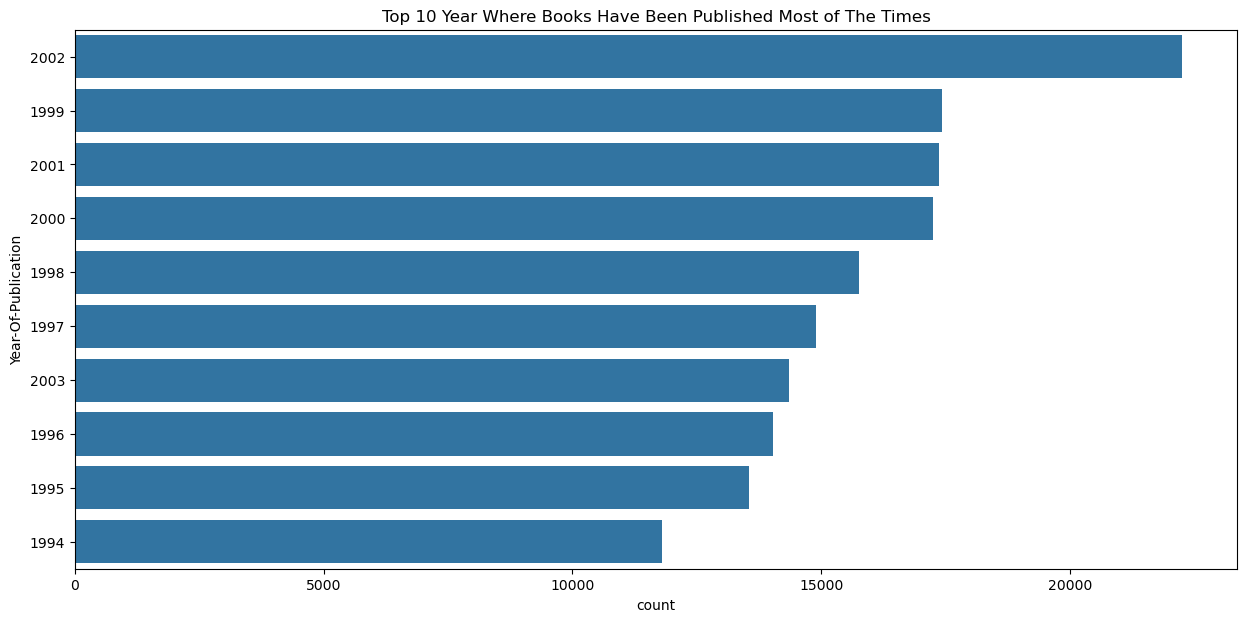

In [32]:
plt.figure(figsize = (15,7))
sns.countplot(y = 'Year-Of-Publication', data = books,order = books.value_counts(books['Year-Of-Publication']).iloc[:10].index)
plt.title('Top 10 Year Where Books Have Been Published Most of The Times')

# Save the plot as an image file
plt.savefig('top_10_years_book_publications.png')

plt.show()

### Handling Missing Values

In [34]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
dtype: int64

In [35]:
books.loc[books['Book-Author'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [36]:
books.loc[books['Publisher'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [37]:
#Dropping the Missing Values

books.dropna(axis = 0, inplace = True)

In [38]:
#No missing values present

books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [39]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [40]:
books.duplicated().sum()   

0

In [41]:
books.nunique()

ISBN                   271356
Book-Title             242132
Book-Author            102021
Year-Of-Publication       115
Publisher               16806
dtype: int64

In [42]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 1968, 1961, 1958, 1974, 1976,
       1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960, 1966,
       1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954, 1950,
       1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011, 1925,
       1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030, 1911,
       1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934, 1910,
       1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901, 2010,
       1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378, 1919,
       1922, 1897, 2024, 1376, 2037])

### ***Visualization***

In [44]:
books['Book-Author'].value_counts()

Book-Author
Agatha Christie         632
William Shakespeare     567
Stephen King            524
Ann M. Martin           423
Carolyn Keene           373
                       ... 
Artiste C. Arthur         1
Emily Pearl Kingsley      1
Jean Cassels              1
Bernice Meyers            1
Christopher  Biffle       1
Name: count, Length: 102021, dtype: int64

##### Top 10 Authors which have written the most books.

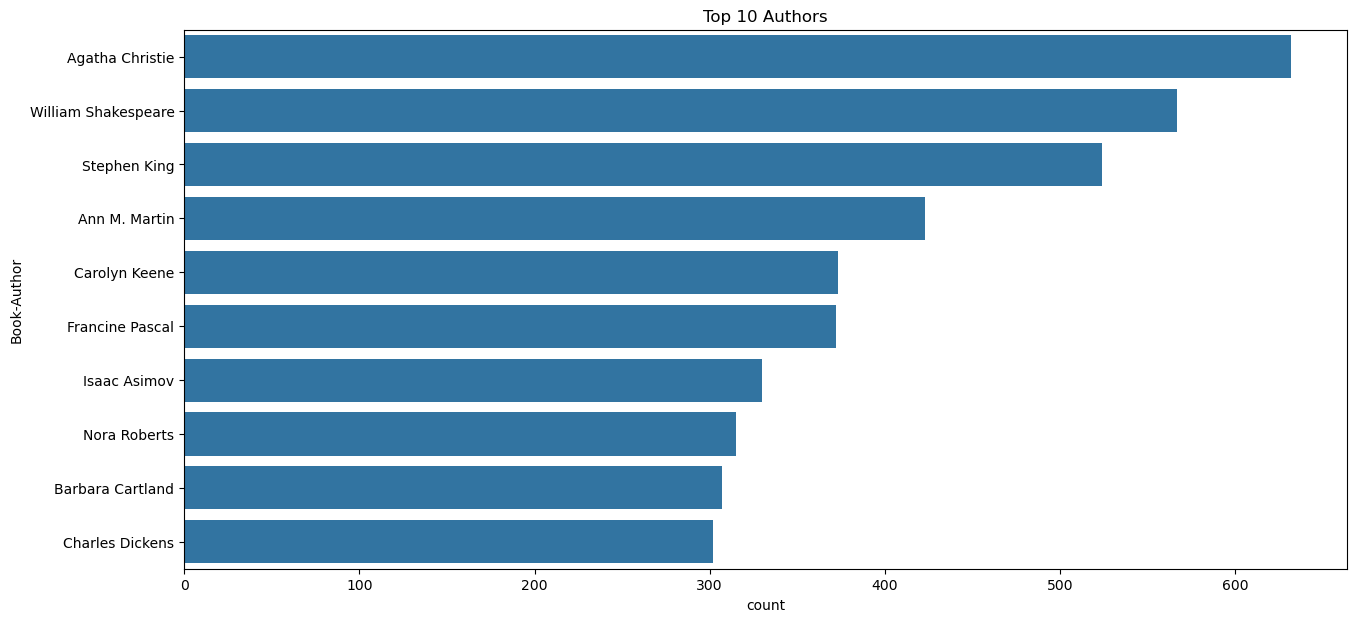

In [46]:
plt.figure(figsize = (15,7))
sns.countplot(y = 'Book-Author',data = books, order = books.value_counts(books['Book-Author']).iloc[:10].index)
plt.title('Top 10 Authors')

plt.savefig('Top 10 Authors written most of the books.png')  
plt.show()

##### Top 10 Publisher which have published the most books.

In [48]:
books['Publisher'].value_counts()

Publisher
Harlequin                  7535
Silhouette                 4220
Pocket                     3905
Ballantine Books           3783
Bantam Books               3646
                           ... 
Polaris Books                 1
Hannover House                1
Amber Quill Press, LLC.       1
Lunchbox Press                1
Connaught                     1
Name: count, Length: 16806, dtype: int64

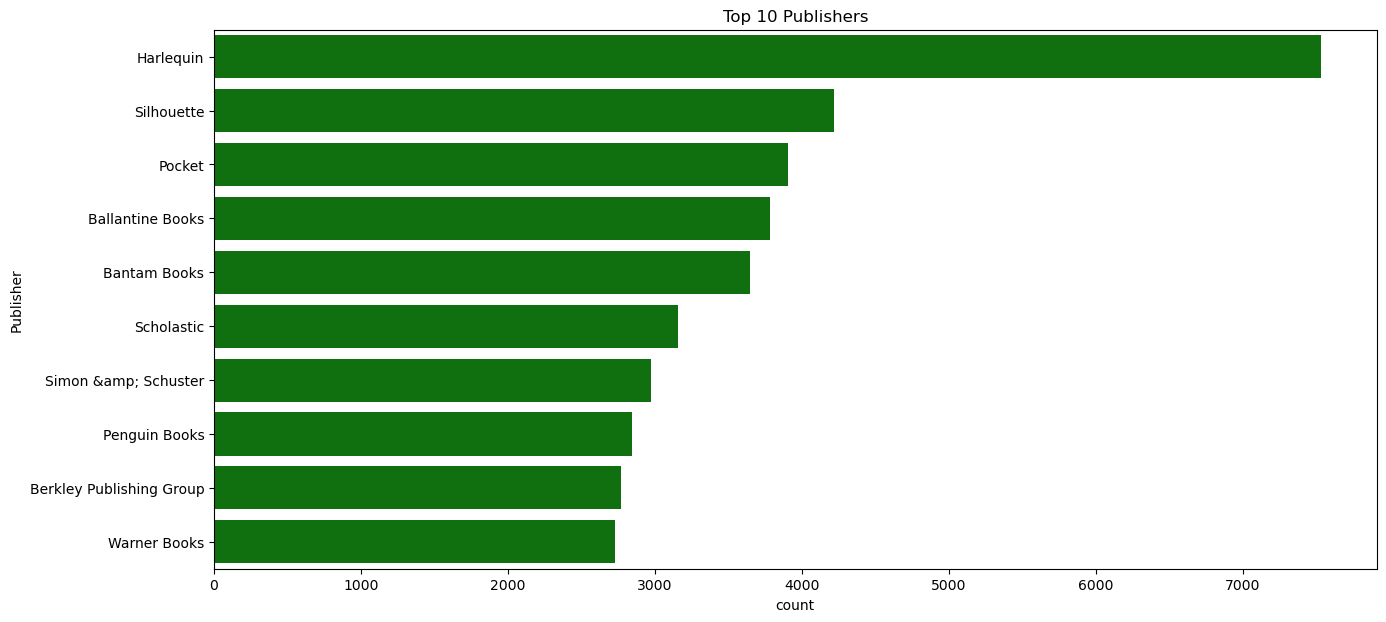

In [49]:
plt.figure(figsize = (15,7))
sns.countplot(y = 'Publisher', data = books,order = books.value_counts(books['Publisher']).iloc[:10].index,color='green')
plt.title('Top 10 Publishers')

plt.savefig('Top 10 Publishers who published most of the books.png') 
plt.show()

### User's Data Pre-Processing

In [51]:
users.shape

(278858, 3)

In [52]:
users.dtypes

User-ID       int64
Location     object
Age         float64
dtype: object

In [53]:
users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [54]:
users.isna().sum()/len(users)*100

User-ID      0.000000
Location     0.000000
Age         39.719857
dtype: float64

In [55]:
users['Age'].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

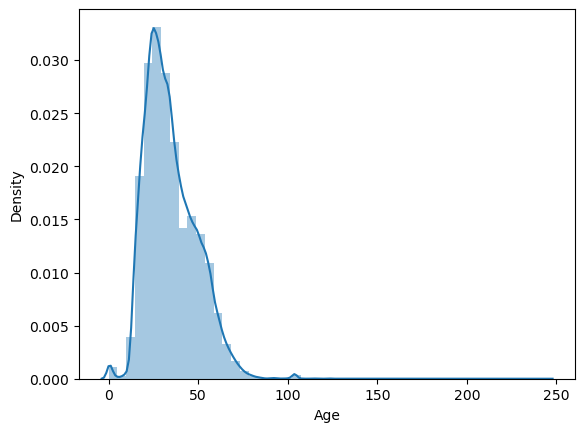

In [56]:
#Understanding the Distribution of Age Column

sns.distplot(users['Age'])

plt.savefig('Age data distribution.png')
plt.show()

In [57]:
median = users['Age'].median()
print(median)

32.0


In [58]:
#Filling the null values of Age column by median of Age Column

users['Age'] = users['Age'].fillna(median)   

In [59]:
users.isna().sum()

User-ID     0
Location    0
Age         0
dtype: int64

In [60]:
users.duplicated().sum()   

0

In [61]:
users['Location'].value_counts()

Location
london, england, united kingdom                  2506
toronto, ontario, canada                         2250
sydney, new south wales, australia               1744
melbourne, victoria, australia                   1708
portland, oregon, usa                            1629
                                                 ... 
gneisenaustr. 3, nordrhein-westfalen, germany       1
-, bayern, germany                                  1
bouchegouf, guelma, algeria                         1
indiana and philadelphia, pennsylvania, usa         1
tacoma, washington, united kingdom                  1
Name: count, Length: 57339, dtype: int64

### ***Visualization***

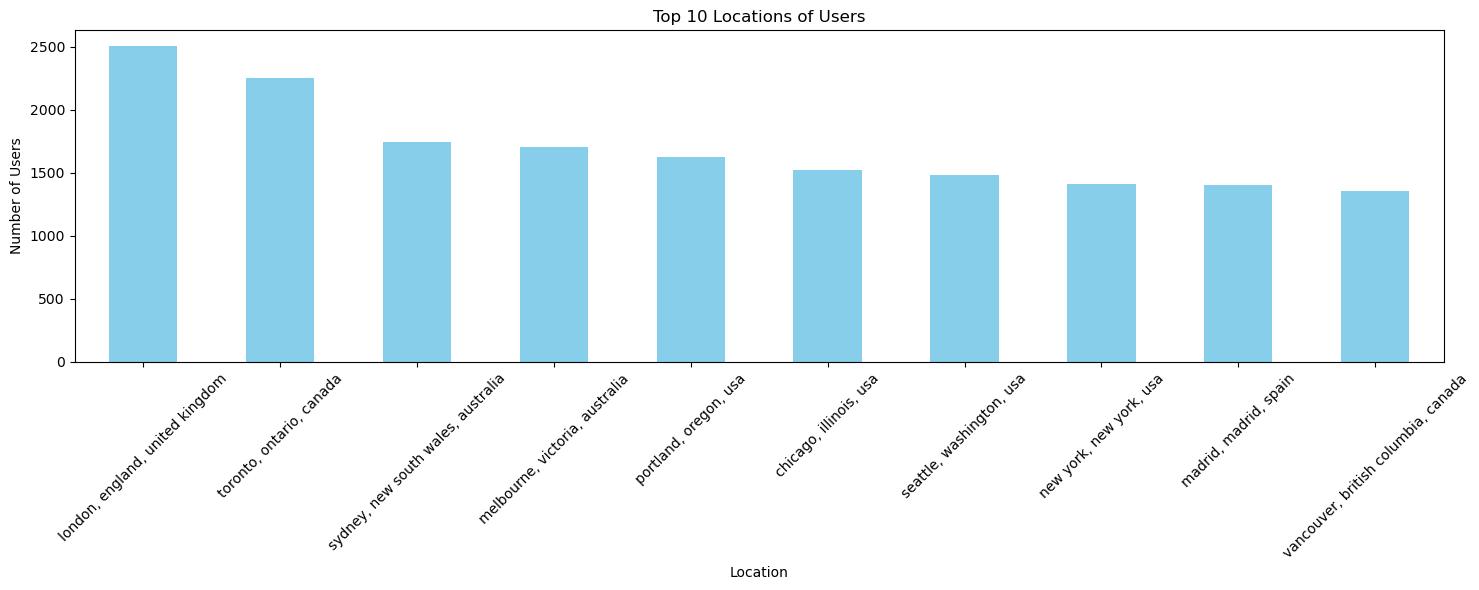

In [63]:
#Plot of where most of the Users are from
#Plot top 10 locations of users

users['Location'].value_counts().head(10).plot(kind='bar', color='skyblue', figsize=(15, 6))
plt.title('Top 10 Locations of Users')
plt.xlabel('Location')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('Top 10 Locations of most of the users.png')
plt.show()

### Ratings Data Pre-Processing

In [65]:
ratings.shape

(1149780, 3)

In [66]:
ratings.dtypes

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object

In [67]:
ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [68]:
np.round(ratings['Book-Rating'].describe(),2)

#Average Rating given by Users including 0 value

count    1149780.00
mean           2.87
std            3.85
min            0.00
25%            0.00
50%            0.00
75%            7.00
max           10.00
Name: Book-Rating, dtype: float64

In [69]:
ratings['Book-Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [70]:
ratings['Book-Rating'].nunique()

11

In [71]:
ratings.duplicated().sum()

0

In [72]:
ratings['Book-Rating'].value_counts()

Book-Rating
0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: count, dtype: int64

### ***Visualization***

##### Books Rating Distribution

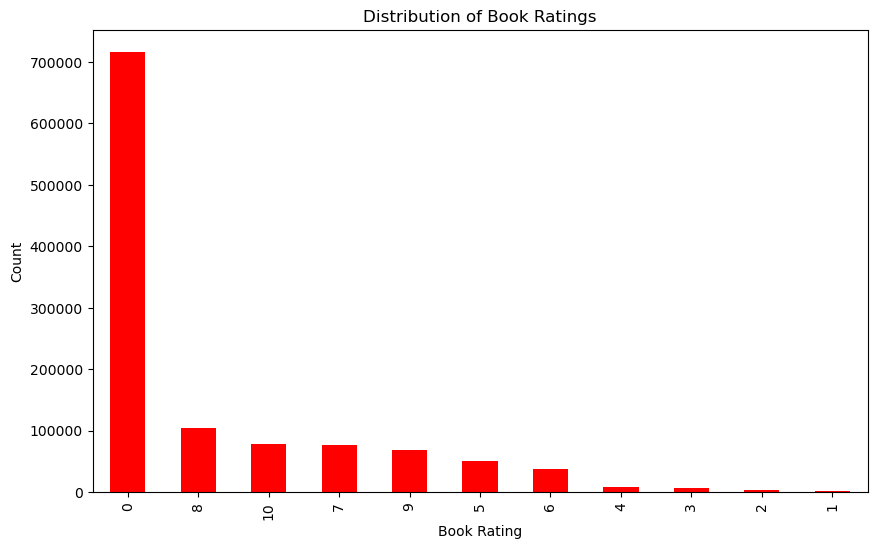

In [75]:
rating_counts = ratings['Book-Rating'].value_counts()

plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color = 'red')

plt.title('Distribution of Book Ratings')
plt.xlabel('Book Rating')
plt.ylabel('Count')
plt.show()

##### Segregating value 0 to understand the proper ratings of books given by users from the scale 1-10

In [77]:
new_ratings = ratings[ratings['Book-Rating'] != 0]

In [78]:
new_ratings['Book-Rating'].value_counts()

Book-Rating
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: count, dtype: int64

In [79]:
np.round(new_ratings['Book-Rating'].describe(),2)

#After removing 0 (implicit value) Average rating we are getting is 7.60

count    433671.00
mean          7.60
std           1.84
min           1.00
25%           7.00
50%           8.00
75%           9.00
max          10.00
Name: Book-Rating, dtype: float64

### ***Visualization after Removing 0 from Rating***

##### ***Ratings given by most of the users***

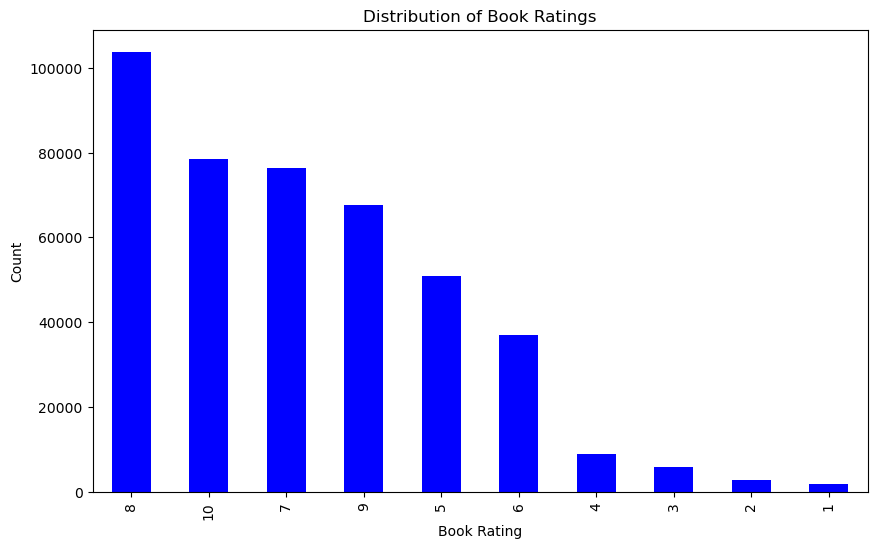

In [82]:
new_rating_counts = new_ratings['Book-Rating'].value_counts()

plt.figure(figsize=(10, 6))
new_rating_counts.plot(kind='bar', color = 'blue')

plt.title('Distribution of Book Ratings')
plt.xlabel('Book Rating')
plt.ylabel('Count')

plt.savefig('Books ratings by user.png')
plt.show()

In [83]:
ratings.shape

(1149780, 3)

In [84]:
new_ratings.shape

(433671, 3)

### Merging Datasets

In [86]:
#Merging Books and Rating Dataset where 0 value of rating is not present on similar column 'ISBN'

df = pd.merge(books,new_ratings, on = 'ISBN')

In [87]:
df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,8
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,67544,8
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,116866,9
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,123629,9
...,...,...,...,...,...,...,...
383833,0395264707,Dreamsnake,Vonda N. McIntyre,1978,Houghton Mifflin,275318,10
383834,1845170423,Cocktail Classics,David Biggs,2004,Connaught,275970,7
383835,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books,276313,5
383836,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),276463,7


In [88]:
#Merging User dataset with above df on similar column which is 'User-ID'

final_df = pd.merge(users,df, on = 'User-ID')

In [89]:
final_df

,User-ID,Location,Age,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Book-Rating
0,8,"timmins, ontario, canada",32.0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,5
1,8,"timmins, ontario, canada",32.0,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,5
2,8,"timmins, ontario, canada",32.0,0887841740,The Middle Stories,Sheila Heti,2004,House of Anansi Press,5
3,8,"timmins, ontario, canada",32.0,1552041778,Jane Doe,R. J. Kaiser,1999,Mira Books,5
4,8,"timmins, ontario, canada",32.0,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998,Brilliance Audio - Trade,6
...,...,...,...,...,...,...,...,...,...
383833,278854,"portland, oregon, usa",32.0,042516098X,Hornet's Nest,Patricia Daniels Cornwell,1998,Berkley Publishing Group,7
383834,278854,"portland, oregon, usa",32.0,0316184152,Final Harvest : Poems,Emily Dickinson,1964,Back Bay Books,7
383835,278854,"portland, oregon, usa",32.0,0375703063,A Virtuous Woman (Oprah's Book Club (Paperback)),Kaye Gibbons,1997,Vintage Books,7
383836,278854,"portland, oregon, usa",32.0,0553275739,In Her Day,Rita Mae Brown,1988,Bantam Books,6


In [90]:
final_df.isna().sum()

User-ID                0
Location               0
Age                    0
ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Book-Rating            0
dtype: int64

In [91]:
final_df.isna().sum()/len(final_df)*100

User-ID                0.0
Location               0.0
Age                    0.0
ISBN                   0.0
Book-Title             0.0
Book-Author            0.0
Year-Of-Publication    0.0
Publisher              0.0
Book-Rating            0.0
dtype: float64

In [92]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383838 entries, 0 to 383837
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User-ID              383838 non-null  int64  
 1   Location             383838 non-null  object 
 2   Age                  383838 non-null  float64
 3   ISBN                 383838 non-null  object 
 4   Book-Title           383838 non-null  object 
 5   Book-Author          383838 non-null  object 
 6   Year-Of-Publication  383838 non-null  int32  
 7   Publisher            383838 non-null  object 
 8   Book-Rating          383838 non-null  int64  
dtypes: float64(1), int32(1), int64(2), object(5)
memory usage: 24.9+ MB


In [93]:
final_df.shape

(383838, 9)

In [94]:
final_df.duplicated().sum()

0

In [95]:
final_df.columns

Index(['User-ID', 'Location', 'Age', 'ISBN', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Book-Rating'],
      dtype='object')

### Re-naming the Columns

In [97]:
final_df.rename(columns = {'User-ID': 'User_ID', 'Book-Title': 'Book_Title', 'Book-Author': 'Book_Author', 'Year-Of-Publication': 'Year_Of_Publication',
                     'Book-Rating': 'Book_Rating'}, inplace = True)

In [98]:
final_df.head()

,User_ID,Location,Age,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Book_Rating
0,8,"timmins, ontario, canada",32.0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,5
1,8,"timmins, ontario, canada",32.0,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,5
2,8,"timmins, ontario, canada",32.0,0887841740,The Middle Stories,Sheila Heti,2004,House of Anansi Press,5
3,8,"timmins, ontario, canada",32.0,1552041778,Jane Doe,R. J. Kaiser,1999,Mira Books,5
4,8,"timmins, ontario, canada",32.0,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998,Brilliance Audio - Trade,6


In [99]:
final_df.columns

Index(['User_ID', 'Location', 'Age', 'ISBN', 'Book_Title', 'Book_Author',
       'Year_Of_Publication', 'Publisher', 'Book_Rating'],
      dtype='object')

In [100]:
#final_df.to_csv('Users_Books_Ratings.csv',index = False)

# *Model Building*

#### *Most Rated Books*

In [103]:
num_rating_df = final_df.groupby('Book_Title').count()['Book_Rating'].reset_index()
num_rating_df

,Book_Title,Book_Rating
0,A Light in the Storm: The Civil War Diary of ...,1
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1
2,Dark Justice,1
3,Earth Prayers From around the World: 365 Pray...,7
4,Final Fantasy Anthology: Official Strategy Gu...,2
...,...,...
135559,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,1
135560,Ã?Â?rger mit Produkt X. Roman.,3
135561,Ã?Â?sterlich leben.,1
135562,Ã?Â?stlich der Berge.,1


In [104]:
num_rating_df.sort_values('Book_Rating', ascending = False)

,Book_Title,Book_Rating
110227,The Lovely Bones: A Novel,707
132238,Wild Animus,581
102701,The Da Vinci Code,494
116194,The Secret Life of Bees,406
111948,The Nanny Diaries: A Novel,393
...,...,...
54564,Journeys with Elijah: Eight Tales of the Prophet,1
54563,Journeys to Door County,1
54561,Journeys of Simplicity: Traveling Light With T...,1
54560,Journeys into Past Lives,1


#### *Average Rating of each Book*

In [106]:
avg_rating_df = final_df.groupby('Book_Title')['Book_Rating'].mean().reset_index()
print(avg_rating_df)

                                               Book_Title  Book_Rating
0        A Light in the Storm: The Civil War Diary of ...     9.000000
1        Ask Lily (Young Women of Faith: Lily Series, ...     8.000000
2                                            Dark Justice    10.000000
3        Earth Prayers From around the World: 365 Pray...     7.142857
4        Final Fantasy Anthology: Official Strategy Gu...    10.000000
...                                                   ...          ...
135559  Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...     8.000000
135560                     Ã?Â?rger mit Produkt X. Roman.     7.000000
135561                                Ã?Â?sterlich leben.     7.000000
135562                              Ã?Â?stlich der Berge.     8.000000
135563                                  Ã?Â?thique en toc     8.000000

[135564 rows x 2 columns]


In [107]:
avg_rating_df.sort_values('Book_Rating', ascending = False)

,Book_Title,Book_Rating
97341,The 637 Best Things Anybody Ever Said,10.0
113528,The Perfect Wife,10.0
16778,CARRYING THE FIRE,10.0
80964,"Psalty's Kids Bible, NIV",10.0
80960,Psalms for All Seasons,10.0
...,...,...
38410,Flamingo,1.0
104959,The Feminist Critique of Language: A Reader,1.0
86113,Sams Teach Yourself Red Hat LINUX in 24 Hours ...,1.0
45757,Headway (Headway),1.0


### *Popular Books*

In [109]:
#Merging most rated books dataset with Average rated books on similar column which is 'Book_Title'

pop_df = pd.merge(num_rating_df,avg_rating_df, on = 'Book_Title')
pop_df.rename(columns={'Book_Rating_x': 'Most_Rated_Books', 'Book_Rating_y': 'Avg_Rating'},inplace=True)
pop_df

,Book_Title,Most_Rated_Books,Avg_Rating
0,A Light in the Storm: The Civil War Diary of ...,1,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
2,Dark Justice,1,10.000000
3,Earth Prayers From around the World: 365 Pray...,7,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,2,10.000000
...,...,...,...
135559,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,1,8.000000
135560,Ã?Â?rger mit Produkt X. Roman.,3,7.000000
135561,Ã?Â?sterlich leben.,1,7.000000
135562,Ã?Â?stlich der Berge.,1,8.000000


In [110]:
#Books that have been rated by more than 50 User's

pop_df[pop_df['Most_Rated_Books']>=50].sort_values('Most_Rated_Books', ascending =False)

,Book_Title,Most_Rated_Books,Avg_Rating
110227,The Lovely Bones: A Novel,707,8.185290
132238,Wild Animus,581,4.390706
102701,The Da Vinci Code,494,8.439271
116194,The Secret Life of Bees,406,8.477833
111948,The Nanny Diaries: A Novel,393,7.437659
...,...,...,...
83198,Remember Me,50,7.840000
85945,Saint Maybe,50,7.480000
88258,Servant of the Bones,50,7.340000
90474,Sleep No More,50,7.400000


##### *Merging it with Final Dataset*

In [112]:
final = pd.merge(pop_df,final_df, on = 'Book_Title')
final

,Book_Title,Most_Rated_Books,Avg_Rating,User_ID,Location,Age,ISBN,Book_Author,Year_Of_Publication,Publisher,Book_Rating
0,A Light in the Storm: The Civil War Diary of ...,1,9.000000,96448,"albuquerque, new mexico, usa",32.0,0590567330,Karen Hesse,1999,Hyperion Books for Children,9
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000,269557,"ypsilanti, michigan, usa",40.0,0310232546,Nancy N. Rue,2001,Zonderkidz,8
2,Dark Justice,1,10.000000,98391,"morrow, georgia, usa",52.0,0399151788,Jack Higgins,2004,Putnam Publishing Group,10
3,Earth Prayers From around the World: 365 Pray...,7,7.142857,26544,"woodbridge, virginia, usa",37.0,006250746X,Elizabeth Roberts,1991,HarperSanFrancisco,9
4,Earth Prayers From around the World: 365 Pray...,7,7.142857,69120,"portland, maine, usa",28.0,006250746X,Elizabeth Roberts,1991,HarperSanFrancisco,10
...,...,...,...,...,...,...,...,...,...,...,...
383833,Ã?Â?rger mit Produkt X. Roman.,3,7.000000,133567,"frankfurt am main, hessen, germany",57.0,325721538X,Joan Aiken,1987,Diogenes Verlag,8
383834,Ã?Â?rger mit Produkt X. Roman.,3,7.000000,225343,"frankfurt am main, hessen, germany",46.0,325721538X,Joan Aiken,1987,Diogenes Verlag,7
383835,Ã?Â?sterlich leben.,1,7.000000,256636,"89075 ulm, baden-wuerttemberg, germany",51.0,3451274973,Anselm GrÃ?Â¼n,2001,"Herder, Freiburg",7
383836,Ã?Â?stlich der Berge.,1,8.000000,90839,"munich, bayern, germany",36.0,3442725739,David Guterson,2000,btb,8


#### *Selecting those User's who have Rated at least 50 or more Book's*

In [114]:
popular_user = final[final['Most_Rated_Books']>=50]
popular_user

,Book_Title,Most_Rated_Books,Avg_Rating,User_ID,Location,Age,ISBN,Book_Author,Year_Of_Publication,Publisher,Book_Rating
801,1984,144,8.784722,254,"minneapolis, minnesota, usa",24.0,0451524934,George Orwell,1990,Signet Book,9
802,1984,144,8.784722,1706,"olympia, washington, usa",26.0,0451524934,George Orwell,1990,Signet Book,10
803,1984,144,8.784722,2179,"sunderland, massachusetts, usa",30.0,0451524934,George Orwell,1990,Signet Book,8
804,1984,144,8.784722,2198,"philadelphia, pennsylvania, usa",32.0,0451524934,George Orwell,1990,Signet Book,10
805,1984,144,8.784722,2799,"eugene, oregon, usa",32.0,0451524934,George Orwell,1990,Signet Book,10
...,...,...,...,...,...,...,...,...,...,...,...
383546,"\O\"" Is for Outlaw""",108,7.444444,269466,"williamsville, illinois, usa",32.0,0449003787,SUE GRAFTON,2001,Ballantine Books,8
383547,"\O\"" Is for Outlaw""",108,7.444444,274301,"frankston, victoria, australia",41.0,0449003787,SUE GRAFTON,2001,Ballantine Books,8
383548,"\O\"" Is for Outlaw""",108,7.444444,274325,"amsterdam, n/a, netherlands",51.0,0449003787,SUE GRAFTON,2001,Ballantine Books,9
383549,"\O\"" Is for Outlaw""",108,7.444444,276050,"beacon, new york, usa",30.0,0449003787,SUE GRAFTON,2001,Ballantine Books,7


In [115]:
popular_user['User_ID'].nunique()

24863

In [116]:
# Drop duplicate User_IDs, keeping the first occurrence
cleaned_df = popular_user.drop_duplicates(subset='User_ID', keep='first')

# If you want to keep the last occurrence instead, use keep='last'

In [117]:
print(cleaned_df.head())
print(f'Shape of Final Dataset is : ',cleaned_df.shape)

    Book_Title  Most_Rated_Books  Avg_Rating  User_ID  \
801       1984               144    8.784722      254   
802       1984               144    8.784722     1706   
803       1984               144    8.784722     2179   
804       1984               144    8.784722     2198   
805       1984               144    8.784722     2799   

                            Location   Age        ISBN    Book_Author  \
801      minneapolis, minnesota, usa  24.0  0451524934  George Orwell   
802         olympia, washington, usa  26.0  0451524934  George Orwell   
803   sunderland, massachusetts, usa  30.0  0451524934  George Orwell   
804  philadelphia, pennsylvania, usa  32.0  0451524934  George Orwell   
805              eugene, oregon, usa  32.0  0451524934  George Orwell   

     Year_Of_Publication    Publisher  Book_Rating  
801                 1990  Signet Book            9  
802                 1990  Signet Book           10  
803                 1990  Signet Book            8  
804   

## *Pivot Table*

In [119]:
user_books_df = cleaned_df.pivot_table(index='User_ID',columns='Book_Title',values='Book_Rating')
user_books_df

Book_Title,1984,1st to Die: A Novel,2nd Chance,4 Blondes,84 Charing Cross Road,A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Confederacy of Dunces (Evergreen Book),...,Wifey,Wild Animus,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Wuthering Heights,Year of Wonders,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,"\O\"" Is for Outlaw"""
User_ID,,,,,,,,,,,,,,,,,,,,,
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
user_books_df.fillna(0,inplace = True) #all the NaN values or missing values will be converted into 0
user_books_df

Book_Title,1984,1st to Die: A Novel,2nd Chance,4 Blondes,84 Charing Cross Road,A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Confederacy of Dunces (Evergreen Book),...,Wifey,Wild Animus,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Wuthering Heights,Year of Wonders,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,"\O\"" Is for Outlaw"""
User_ID,,,,,,,,,,,,,,,,,,,,,
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### *How Many times, 1984 A Novel Book by George have been Rated by Users*

In [122]:
user_books_df['1984'].value_counts() 

1984
0.0     24720
10.0       56
9.0        33
8.0        28
7.0        21
6.0         3
5.0         2
Name: count, dtype: int64

### *Cosine Based Similarity*

###### *To Find out Similar User's*

In [124]:
from sklearn.metrics.pairwise import cosine_similarity

In [125]:
similarity_scores = cosine_similarity(user_books_df)
similarity_scores

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [126]:
similarity_scores.shape

(24863, 24863)

##### *Defining a Function to Recommend Book's based on User ID*

In [128]:
def recommend(user_id):
    similar_users = np.argsort(-similarity_scores[np.where(user_books_df.index == user_id)[0][0]])[1:6]
    recommended_books = set()
    for user in similar_users:
        user_books = cleaned_df[cleaned_df['User_ID'] == user_books_df.index[user]]
        for _, row in user_books.iterrows():
            if len(recommended_books) < 10:
                recommended_books.add(row['Book_Title'])
            else:
                break
    return list(recommended_books)

In [129]:
recommend(254)

['1984']

In [130]:
recommend(26)

['Seabiscuit: An American Legend']

In [131]:
recommend(9)

['Beloved (Plume Contemporary Fiction)']

In [132]:
recommend(16)

['Airframe']

In [133]:
recommend(278854)

["A Virtuous Woman (Oprah's Book Club (Paperback))"]

### ***Deployment***

In [135]:
#cleaned df

cleaned_df.to_csv('cleaned_df.csv',index = False)

In [136]:
#pivot table

user_books_df.to_csv('user_books_df.csv',index = False)

In [137]:
np.save('similarity_scores.npy', similarity_scores)